<a href="https://colab.research.google.com/github/LeonardoVieiraGuimaraes/MiniCursoPalestra/blob/main/CNN/simple_cnn_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN simples para Google Colab (versão melhorada)

Este notebook treina uma pequena rede convolucional (CNN) no conjunto MNIST. Ele foi preparado para rodar diretamente no Google Colab e contém instruções, instalação de dependências, checagem de ambiente, treino com callbacks e salvamento do modelo no Drive.

**Checklist antes de começar**:
- (Colab) Runtime → Change runtime type → GPU.
- Execute as células em ordem.
- Célula 1 instala dependências somente quando detectar Colab; em local, siga as instruções na célula correspondente.

In [1]:
# Célula 1 — Instala dependências (apenas no Colab)
# Detecta Colab de forma segura e instala pacotes necessários.
try:
    import google.colab
    IN_COLAB = True
except Exception:
    IN_COLAB = False

if IN_COLAB:
    print('Google Colab detectado — instalando dependências (tensorflow, matplotlib, numpy) ...')
    import subprocess, sys
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', '-q', 'tensorflow', 'matplotlib', 'numpy'])
    print('Instalação concluída. Reinicie o runtime se necessário.')
else:
    print('Não detectado Google Colab. Para instalar localmente, execute:')
    print('python -m pip install tensorflow matplotlib numpy')

Google Colab detectado — instalando dependências (tensorflow, matplotlib, numpy) ...
Instalação concluída. Reinicie o runtime se necessário.


## Checar ambiente e importar bibliotecas
A célula abaixo importa as bibliotecas principais, exibe a versão do TensorFlow e lista GPUs disponíveis (se houver).

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print('TensorFlow version:', tf.__version__)
gpus = tf.config.list_physical_devices('GPU')
print('GPUs found:', gpus)

TensorFlow version: 2.19.0
GPUs found: []


## Carregar e pré-processar MNIST
Vamos carregar os dados MNIST, normalizar os pixels para [0,1] e preparar as dimensões para a CNN. Também mostramos algumas amostras.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28, 1) y_train shape: (60000,)


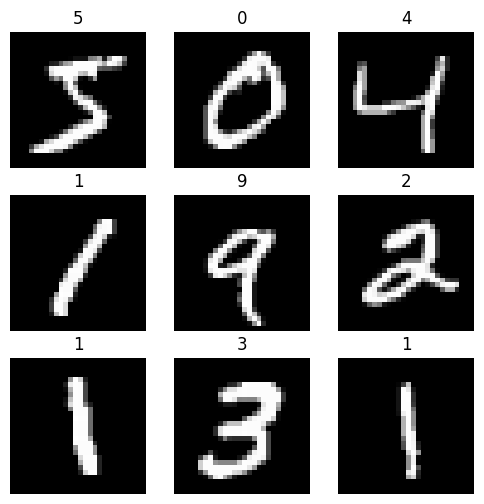

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalizar e expandir canal
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)  # (60000, 28, 28, 1)
x_test = np.expand_dims(x_test, -1)

print('x_train shape:', x_train.shape, 'y_train shape:', y_train.shape)

# Mostrar as 9 primeiras imagens de treino
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(str(y_train[i]))
    plt.axis('off')
plt.show()

## Definir a arquitetura da CNN
Arquitetura simples para demonstração: Conv(32) -> Pool -> Conv(64) -> Pool -> Dense(128) -> Output.

In [4]:
from tensorflow.keras import layers, models

def build_simple_cnn(input_shape=(28,28,1), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = build_simple_cnn()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## Compilar e treinar (com callbacks)
Usamos Adam e sparse categorical crossentropy (rótulos como inteiros). Adicionamos EarlyStopping e ModelCheckpoint para salvar o melhor modelo.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Salvar melhor modelo localmente (runtime)
checkpoint_path = 'best_model.h5'
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True)
]

history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.1,
                    callbacks=callbacks)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8078 - loss: 0.6100

422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 62ms/step - accuracy: 0.8080 - loss: 0.6092 - val_accuracy: 0.9818 - val_loss: 0.0619
Epoch 2/15
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9727 - loss: 0.0916

422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 56ms/step - accuracy: 0.9728 - loss: 0.0916 - val_accuracy: 0.9872 - val_loss: 0.0416
Epoch 3/15
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9799 - loss: 0.0664

422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9799 - loss: 0.0664 - val_accuracy: 0.9890 - val_loss: 0.0404
Epoch 4/15
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9831 - loss: 0.0549

422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - accuracy: 0.9831 - loss: 0.0549 - val_accuracy: 0.9887 - val_loss: 0.0350
Epoch 5/15
 53/422 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.9829 - loss: 0.0598

In [ ]:
# Plot das curvas de treino/validação
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.title('Accuracy')
plt.show()

In [ ]:
# Avaliar no conjunto de teste
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}')

## Prever e mostrar algumas imagens
Mostramos previsões para as primeiras 25 imagens do conjunto de teste e colorimos o rótulo em verde quando correto e vermelho quando incorreto.

In [ ]:
preds = model.predict(x_test[:25])
pred_labels = np.argmax(preds, axis=1)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].squeeze(), cmap=plt.cm.binary)
    color = 'green' if pred_labels[i] == y_test[i] else 'red'
    plt.xlabel(f'pred: {pred_labels[i]}  true: {y_test[i]}', color=color)
plt.show()

## Salvar o modelo (opcional no Drive)
Se você estiver no Colab e quiser guardar o modelo no Google Drive, descomente e execute a célula abaixo; ela monta o Drive e salva o arquivo.

In [ ]:
# Célula opcional: salvar em Google Drive (executar apenas em Colab)
try:
    import google.colab
    IN_COLAB = True
except Exception:
    IN_COLAB = False

if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    dest = '/content/drive/MyDrive/simple_cnn_mnist.h5'
    model.save(dest)
    print('Modelo salvo em', dest)
else:
    # Salvar localmente no runtime (download manual depois)
    local_path = 'simple_cnn_mnist.h5'
    model.save(local_path)
    print('Modelo salvo localmente em', local_path)

---
## Notas finais e como rodar localmente
- Para rodar localmente, crie um ambiente virtual e instale dependências:
  ```powershell
  python -m venv .venv
  .venvcriptsctivate.ps1
  python -m pip install --upgrade pip
  python -m pip install tensorflow matplotlib numpy
  ```
- Em sistemas sem GPU ou com GPU incompatível, instale a versão apropriada do TensorFlow conforme sua GPU/OS.
- Próximos passos sugeridos: aumentar epochs, experimentar Fashion-MNIST/CIFAR-10, usar data augmentation, e hiperparâmetros.

Pronto — notebook refeito e melhorado. Se quiser, eu adiciono comentários por célula, um `requirements.txt` no repositório ou fixo versões dos pacotes.